In [13]:
import pints
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd

In [133]:
def iterate_method(method, log_pdf, log_prior, nchains, mcmc_iter, repeats=10):
    results = []
    for i in range(repeats):
        pass

## Gaussian model

In [126]:
xtrue = np.array([2, 4])
sigma = np.diag(np.array([1, 3]))
log_pdf = pints.toy.GaussianLogPDF(xtrue, sigma)
log_prior = pints.MultivariateGaussianLogPrior(xtrue + 1, sigma * 2)

### Differential evolution

In [127]:
nchains = 10
x0 = log_prior.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.DifferentialEvolutionMCMC)
mcmc.set_max_iterations(10000)
mcmc.set_log_to_screen(False)
chains = mcmc.run()

In [128]:
results = pints.MCMCSummary(chains=chains, time=mcmc.time())
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess       ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  --------  --------------
param 1  2.00    1.00    0.04    1.33   2.01   2.68   3.96     1.00    10277.20  600.93
param 2  4.00    1.75    0.56    2.81   4.01   5.18   7.41     1.00    10045.05  587.35


In [129]:
chains1 = np.vstack(chains)
df = pd.DataFrame({'x0': chains1[:, 0], 'x1': chains1[:, 1]})
iterations = []
chain = []
for i in range(len(chains)):
    for j in range(chains[0].shape[0]):
        iterations.append(j)
        chain.append(str(i))
df['iter'] = iterations
df['chain'] = chain

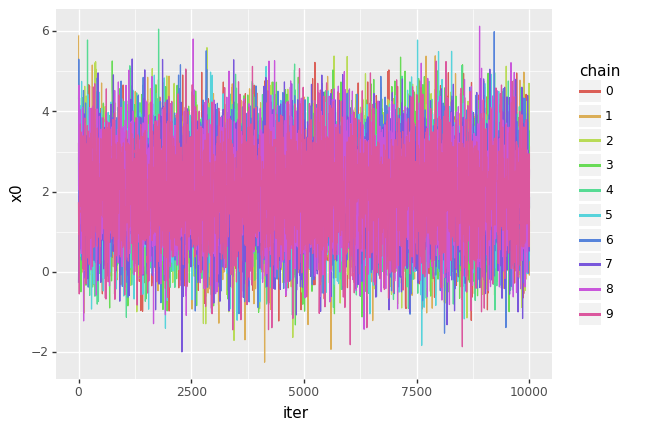

<ggplot: (357322053)>

In [130]:
(ggplot(df, aes(x='iter', y='x0', colour='chain')) +
 geom_line())

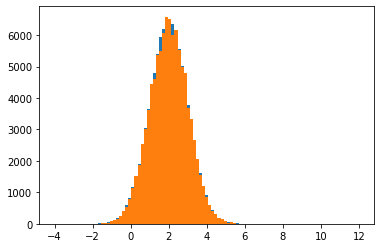

In [131]:
x0 = np.random.normal(xtrue[0], np.sqrt(sigma[0, 0]), size=len(chains1))
x1 = np.random.normal(xtrue[1], np.sqrt(sigma[1, 1]), size=len(chains1))
plt.hist(x0, bins=np.linspace(-4, 12, 100))
plt.hist(df['x0'], bins=np.linspace(-4, 12, 100)) 
plt.show()

In [132]:
log_pdf.kl_divergence(chains1)

9.139351637799109e-05

In [85]:
df_hyperparameters = pd.DataFrame({'example': 'GaussianLogPDF',
                                   'method': 'DifferentialEvolutionMCMC',
                                   'chains': [10],
                                   'iter': [10000]})

### DREAM

In [60]:
nchains = 10
x0 = log_prior.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.DreamMCMC)
mcmc.set_max_iterations(10000)
mcmc.set_log_to_screen(False)
chains = mcmc.run()

In [61]:
results = pints.MCMCSummary(chains=chains, time=mcmc.time())
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
param 1  2.01    0.99    0.05    1.35   1.99   2.67   3.98     1.00    4557.88  98.35
param 2  4.01    1.73    0.62    2.84   3.99   5.16   7.45     1.00    4613.12  99.54


In [89]:
df_hyperparameters = df_hyperparameters.append(pd.DataFrame({'example': 'GaussianLogPDF',
                                        'method': 'DreamMCMC',
                                        'chains': [10],
                                        'iter': [10000]}))

### HMC

In [80]:
nchains = 4
x0 = log_prior.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(1000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(1)
    
chains = mcmc.run()

Using Hamiltonian Monte Carlo
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:00.0
1     84     0.333     0.333     0.333     0.333      0:00.0
2     164    0.5       0.5       0.5       0.5        0:00.0
3     244    0.6       0.6       0.6       0.6        0:00.1
100   8004   0.98      0.98      0.98      0.98       0:01.6
200   16004  0.990099  0.990099  0.990099  0.990099   0:03.3
300   24004  0.993     0.993     0.993     0.993      0:04.9
400   32004  0.995     0.995     0.993     0.995      0:06.5
500   40004  0.996     0.996     0.994     0.996      0:08.1
600   48004  0.997     0.997     0.995     0.997      0:09.8
700   56004  0.997151  0.997151  0.996     0.997151   0:11.4
800   64004  0.998     0.998     0.996     0.998      0:13.0
900   72004  0.998     0.998     0.997     0.998      0:14.7
1000  79924  0.998002  0.998002  0.997003  0.997003   0:16.3
Haltin

In [81]:
results = pints.MCMCSummary(chains=chains, time=mcmc.time())
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
param 1  2.02    0.97    0.14    1.37   2.01   2.66   3.95     1.00    1333.33  81.65
param 2  3.97    1.73    0.58    2.79   3.99   5.14   7.29     1.00    897.40   54.96


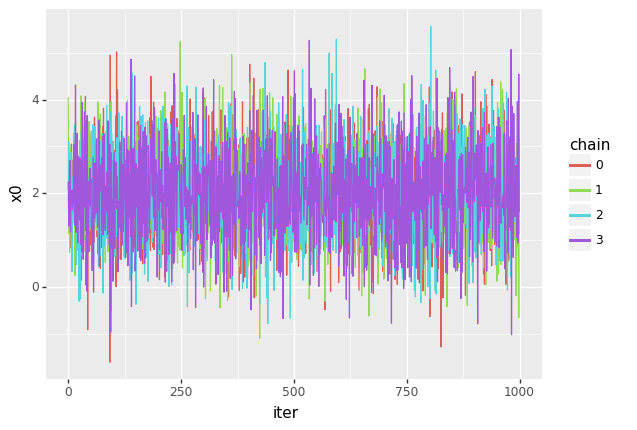

<ggplot: (348859029)>

In [82]:
chains1 = np.vstack(chains)
df = pd.DataFrame({'x0': chains1[:, 0], 'x1': chains1[:, 1]})
iterations = []
chain = []
for i in range(len(chains)):
    for j in range(chains[0].shape[0]):
        iterations.append(j)
        chain.append(str(i))
df['iter'] = iterations
df['chain'] = chain

(ggplot(df, aes(x='iter', y='x0', colour='chain')) +
 geom_line())

In [90]:
df_hyperparameters = df_hyperparameters.append(pd.DataFrame({'example': 'GaussianLogPDF',
                                        'method': 'HamiltonianMCMC',
                                        'chains': [4],
                                        'iter': [1000]}))

## Banana

In [136]:
log_pdf = pints.toy.TwistedGaussianLogPDF(dimension=2, b=0.1)
log_prior = pints.MultivariateGaussianLogPrior([0, 0], [[10, 0], [0, 10]])

### Differential evolution

In [122]:
nchains = 20
x0 = log_prior.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.DifferentialEvolutionMCMC)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)
chains = mcmc.run()

In [123]:
results = pints.MCMCSummary(chains=chains, time=mcmc.time())
print(results)

param    mean     std.    2.5%     25%      50%     75%    97.5%    rhat    ess     ess per sec.
-------  -------  ------  -------  -------  ------  -----  -------  ------  ------  --------------
param 1  -22.16   25.36   -66.65   -42.95   -21.34  -1.62  20.84    1.19    216.54  12.31
param 2  -103.41  133.37  -434.75  -173.98  -40.52  -0.50  10.10    1.19    211.35  12.02


In [124]:
log_pdf.kl_divergence(np.vstack(chains[:, 1000:]))

0.8822210048759089

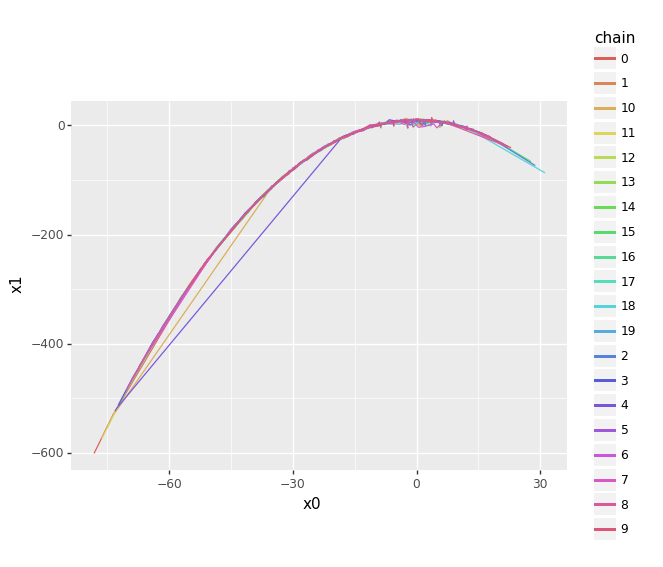

<ggplot: (354076965)>

In [125]:
chains1 = np.vstack(chains)
df = pd.DataFrame({'x0': chains1[:, 0], 'x1': chains1[:, 1]})
iterations = []
chain = []
for i in range(len(chains)):
    for j in range(chains[0].shape[0]):
        iterations.append(j)
        chain.append(str(i))
df['iter'] = iterations
df['chain'] = chain

(ggplot(df, aes(x='x0', y='x1', colour='chain')) +
 geom_line())

### Dream

In [137]:
nchains = 20
x0 = log_prior.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.DreamMCMC)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)
chains = mcmc.run()

In [138]:
results = pints.MCMCSummary(chains=chains, time=mcmc.time())
print(results)
log_pdf.kl_divergence(np.vstack(chains[:, 1000:]))

param    mean    std.    2.5%     25%     50%     75%    97.5%    rhat    ess     ess per sec.
-------  ------  ------  -------  ------  ------  -----  -------  ------  ------  --------------
param 1  -1.62   25.33   -55.95   -16.14  0.88    16.58  45.19    1.27    233.28  4.98
param 2  -54.38  83.92   -302.98  -76.68  -16.58  3.95   10.18    1.44    178.41  3.81


0.8342577855375872

### HMC

In [147]:
nchains = 4
x0 = log_prior.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(2000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(2)
    
chains = mcmc.run()

Using Hamiltonian Monte Carlo
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:00.0
1     84     0.333     0.333     0.333     0.333      0:00.0
2     164    0.5       0.5       0.5       0.5        0:00.0
3     244    0.6       0.6       0.6       0.6        0:00.0
100   8004   0.951     0.98      0.98      0.98       0:01.1
200   16004  0.921     0.985     0.975     0.970297   0:02.1
300   24004  0.93      0.983     0.983     0.98       0:03.2
400   32004  0.94      0.985     0.988     0.978      0:04.3
500   40004  0.948     0.986     0.98      0.978      0:05.4
600   48004  0.953     0.986711  0.98      0.978      0:06.5
700   56004  0.95      0.988604  0.976     0.980057   0:07.5
800   64004  0.954     0.988     0.975     0.98       0:08.6
900   72004  0.956     0.983     0.971     0.981153   0:09.7
1000  80004  0.956     0.972     0.969     0.978      0:10.8
1100  

In [149]:
results = pints.MCMCSummary(chains=chains[: 1000:], time=mcmc.time())
print(results)
log_pdf.kl_divergence(np.vstack(chains))

param    mean    std.    2.5%    25%     50%     75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  ------  ------  -----  -------  ------  -----  --------------
param 1  -1.85   17.37   -28.75  -18.18  -2.35   14.02  27.22    1.17    48.97  2.28
param 2  -20.52  25.80   -77.53  -38.62  -15.08  2.46   10.31    1.08    62.00  2.89


1.2664362003592453

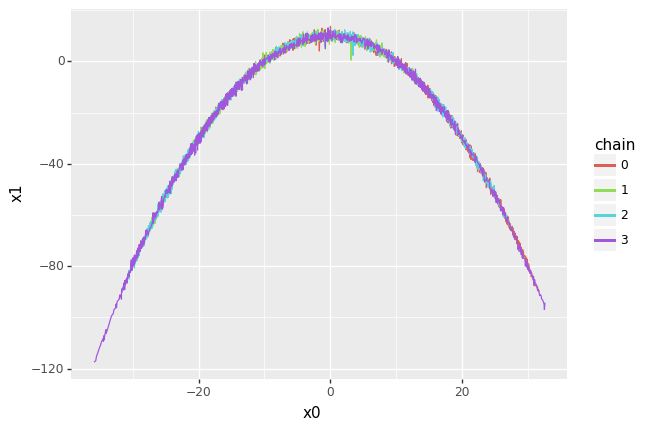

<ggplot: (359505097)>

In [150]:
chains1 = np.vstack(chains)
df = pd.DataFrame({'x0': chains1[:, 0], 'x1': chains1[:, 1]})
iterations = []
chain = []
for i in range(len(chains)):
    for j in range(chains[0].shape[0]):
        iterations.append(j)
        chain.append(str(i))
df['iter'] = iterations
df['chain'] = chain

(ggplot(df, aes(x='x0', y='x1', colour='chain')) +
 geom_line())

## Slightly multimodal Gaussian

## (Moderately) high dimensional Gaussian

### Different MCMC algorithms need different test problems!

### Need to run (say) 100x to determine what prob(pass) is. Need to select threshold such that prob(pass) is high (otherwise, large uncertainty). But how large? Too large and we don't detect anything... Do we just want all methods to look at pass / fail?

No, I don't think we do want binary pass /fail as it drops information. Need to find a good approximating distribution for the KL div for each distribution. Looks more like skew-normal is reasonable than normal. But need to fit a host of these.